Problem Statement :-
To predict if a user will pruchase an item or not, depending on the variables such as User ID, Gender, Age, EstimatedSalary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\sreedev\Downloads\Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### EDA

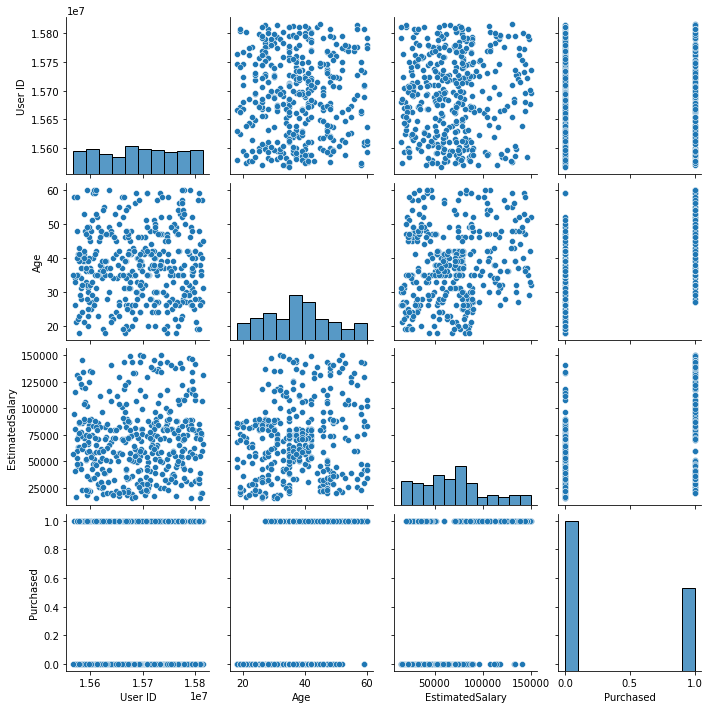

In [5]:
sns.pairplot(data)

In [6]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


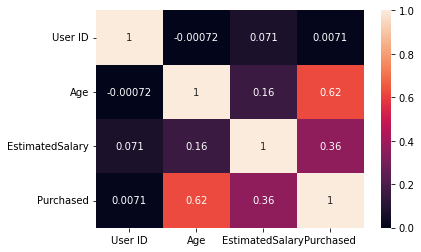

In [7]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
data = data.drop(['User ID'], axis =1)

In [9]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [10]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


### Model Building

In [11]:
y = data['Purchased']
x = data.drop(['Purchased'],axis = 1)

In [12]:
x.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(x)

StandardScaler()

In [16]:
x_scaled = scaler.transform(x)
x_scaled

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [20]:
LR.fit(x_train,y_train)

LogisticRegression()

In [21]:
LR.score(x_test,y_test)

0.8875

In [22]:
import statsmodels.api as sm

In [23]:
reg_log = sm.Logit(y,x_scaled)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.416778
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                  0.3607
Time:                        12:15:03   Log-Likelihood:                -166.71
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.392e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0746      0.136     -0.549      0.583      -0.341       0.192
x2             2.0227      0.217      9.318      0.000       1.597       2.448
x3             1.0780      0.175      6.173      0.000       0.736       1.420
==============================================================================
"""

In [24]:
results_log.pred_table()

array([[186.,  71.],
       [  8., 135.]])

In [25]:
predictions = LR.predict(x_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

